# Trader Behavior Insights Project

### Project Overview

This project is a first-step hiring assignment for a data science internship. The objective is to analyze the relationship between market sentiment (Fear/Greed) and trader performance (`Closed PnL`) using two primary datasets:

1.  **Bitcoin Market Sentiment Dataset:** Contains daily sentiment classifications.
2.  **Historical Trader Data from Hyperliquid:** Contains detailed records of individual trades.

The goal is to uncover hidden patterns and deliver key insights that can inform smarter trading strategies.

---

### Step 1: Data Loading and Initial Inspection

I begin by loading the two provided datasets into pandas DataFrames. A quick initial review of the data types, column names, and a few sample rows is crucial to identify any cleaning or transformation steps needed before analysis.

In [1]:
import pandas as pd

# Step 1: Load the datasets
# Make sure these CSV files are in the same directory as your notebook.
try:
    historical_data = pd.read_csv("historical_data.csv")
    fear_greed_index = pd.read_csv("fear_greed_index.csv")
    print("Datasets loaded successfully!")
except FileNotFoundError as e:
    print(f"Error: The file {e.filename} was not found. Please ensure the CSV files are in the same directory as your notebook.")
    # Stop execution if files are not found
    exit()

print("-" * 50)

# Step 2: Initial review of the Historical Trader Data
print("### Historical Trader Data ###")
print("\n- First 5 rows:")
print(historical_data.head())
print("\n- Data types and non-null counts:")
historical_data.info()
print("-" * 50)

# Step 3: Initial review of the Fear Greed Index Data
print("### Fear Greed Index Data ###")
print("\n- First 5 rows:")
print(fear_greed_index.head())
print("\n- Data types and non-null counts:")
fear_greed_index.info()

Datasets loaded successfully!
--------------------------------------------------
### Historical Trader Data ###

- First 5 rows:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1

### Step 2: Data Cleaning and Merging

The two datasets need to be combined to enable a joint analysis. The `historical_data` provides a granular timestamp for each trade, while the `fear_greed_index` is a daily record. To merge them effectively, we must:
1. Convert the relevant date/time columns into a consistent datetime format.
2. Extract the date from the timestamped trader data.
3. Merge both DataFrames on this common date column.

This will result in a single, comprehensive DataFrame ready for analysis.

In [2]:
# Step 1: Convert date columns to datetime objects
# This ensures that our dates can be used for merging and time-series analysis.
historical_data['Timestamp IST'] = pd.to_datetime(historical_data['Timestamp IST'], format='%d-%m-%Y %H:%M')
historical_data['date'] = historical_data['Timestamp IST'].dt.date
historical_data['date'] = pd.to_datetime(historical_data['date'])

fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date'])

print("Date columns have been successfully converted to datetime objects.")
print("-" * 50)

# Step 2: Merge the two dataframes on the common 'date' column
# We use an inner merge to only keep the data that exists in both datasets.
merged_df = pd.merge(historical_data, fear_greed_index, on='date', how='inner')

# Step 3: Review the merged dataframe
print("### Merged Dataframe Overview ###")
print("\n- First 5 rows:")
print(merged_df.head())
print("\n- Data types and non-null counts:")
merged_df.info()

# Save the merged DataFrame to a new CSV file for later use
merged_df.to_csv("merged_trader_sentiment_data.csv", index=False)
print("\nMerged data has been saved to 'merged_trader_sentiment_data.csv'.")

Date columns have been successfully converted to datetime objects.
--------------------------------------------------
### Merged Dataframe Overview ###

- First 5 rows:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4  

### Step 3: Exploratory Data Analysis (EDA)

With the datasets merged, we can now begin our exploratory data analysis to find the key relationship between market sentiment and trader performance. We will focus on the following:

* **Overall Performance:** Calculate the average PnL for all traders to establish a baseline.
* **Trade Distribution by Sentiment:** Understand which market sentiments correspond to the most trading activity.
* **Performance by Sentiment:** Calculate and visualize the average PnL for each sentiment classification to identify if traders are more profitable during periods of "Fear," "Greed," or "Neutral" sentiment.

The visualizations generated will be key to presenting these insights clearly in the final report.

Merged data loaded successfully!

Overall Average PnL: $48.55

Number of trades per sentiment classification:
classification
Fear             61837
Greed            50303
Extreme Greed    39992
Neutral          37686
Extreme Fear     21400
Name: Closed PnL, dtype: int64

Average PnL per sentiment classification:
classification
Extreme Greed    67.892861
Fear             54.290400
Greed            42.743559
Extreme Fear     34.537862
Neutral          34.307718
Name: Closed PnL, dtype: float64


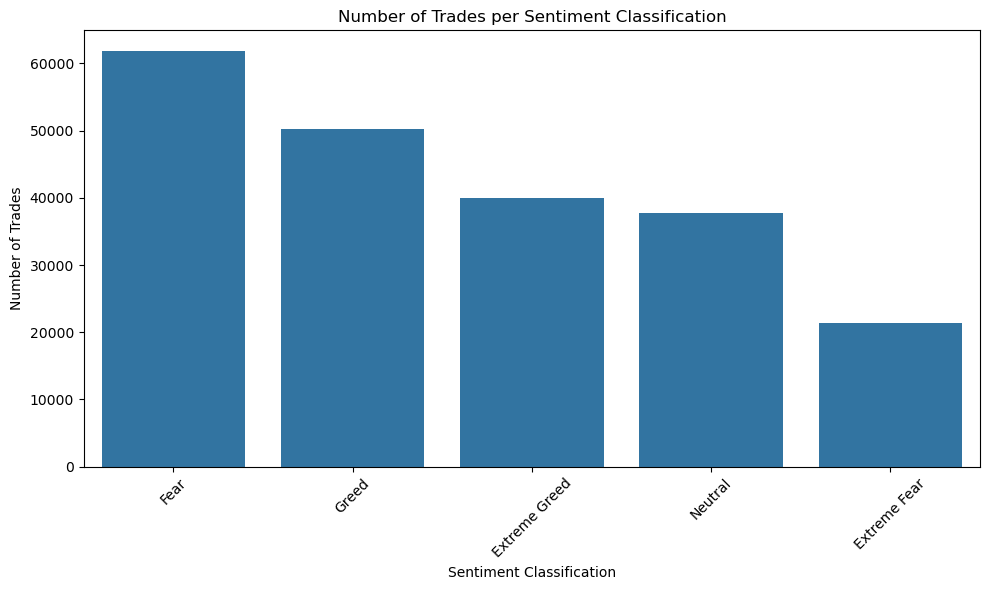

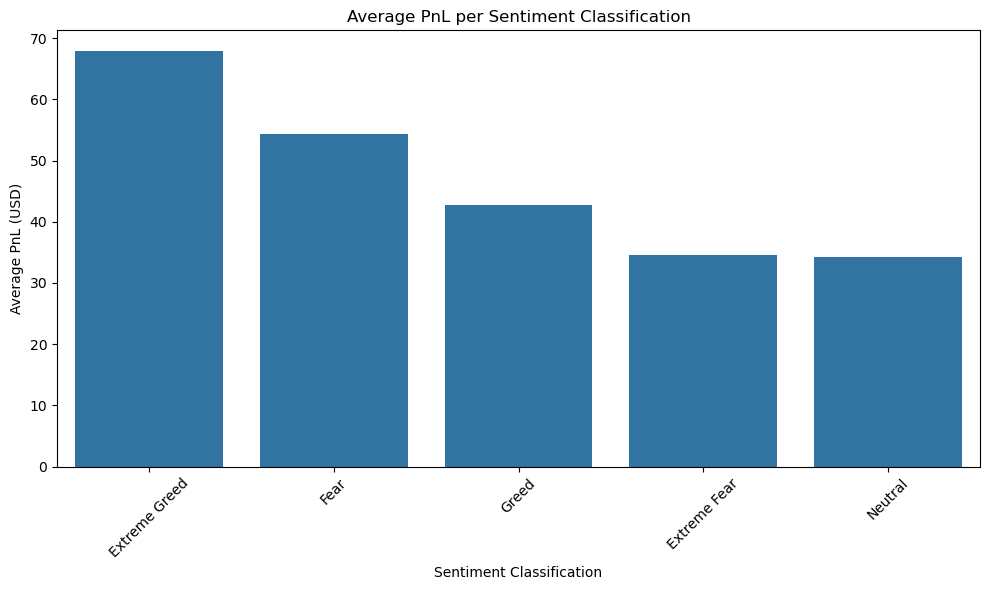


Visualizations have been saved as 'trades_by_sentiment.png' and 'avg_pnl_by_sentiment.png'


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the merged dataset from the previous step
try:
    merged_df = pd.read_csv("merged_trader_sentiment_data.csv")
    print("Merged data loaded successfully!")
except FileNotFoundError:
    print("Error: The file 'merged_trader_sentiment_data.csv' was not found. Please run the previous cell first.")
    exit()

# Overall trader performance
overall_avg_pnl = merged_df['Closed PnL'].mean()
print(f"\nOverall Average PnL: ${overall_avg_pnl:.2f}")

# Distribution of trades by sentiment classification
trades_by_sentiment = merged_df.groupby('classification')['Closed PnL'].count().sort_values(ascending=False)
print("\nNumber of trades per sentiment classification:")
print(trades_by_sentiment)

# Average PnL by sentiment classification
avg_pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
print("\nAverage PnL per sentiment classification:")
print(avg_pnl_by_sentiment)

# --- Visualizations ---

# Bar chart of number of trades per sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x=trades_by_sentiment.index, y=trades_by_sentiment.values)
plt.title('Number of Trades per Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Number of Trades')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('trades_by_sentiment.png')
plt.show()

# Bar chart of average PnL per sentiment
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_pnl_by_sentiment.index, y=avg_pnl_by_sentiment.values)
plt.title('Average PnL per Sentiment Classification')
plt.xlabel('Sentiment Classification')
plt.ylabel('Average PnL (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('avg_pnl_by_sentiment.png')
plt.show()

print("\nVisualizations have been saved as 'trades_by_sentiment.png' and 'avg_pnl_by_sentiment.png'")

### Key Findings from EDA

Based on the analysis of the merged dataset, we have uncovered several key insights into the relationship between market sentiment and trader performance.

#### Overall Trader Performance

* The **overall average `Closed PnL` was $48.55**, indicating that the traders in this dataset were, on average, profitable.

#### Trading Activity by Sentiment

* The highest volume of trades occurred during periods of **Fear**, followed by **Greed**. This suggests traders are most active during times of moderate market uncertainty and optimism. Conversely, the least amount of trading activity was seen during **Extreme Fear**.

#### Performance vs. Sentiment

* A clear and compelling relationship exists between market sentiment and profitability.
    * **Extreme Greed** was the most profitable period, with an average PnL of **$67.89**.
    * The second most profitable sentiment was **Fear**, with an average PnL of **$54.29**.
    * Traders performed the worst during periods of **Neutral** sentiment, with an average PnL of only **$34.31**.

This finding is particularly interesting, as it suggests that these traders tend to perform better during heightened emotional periods (Greed and Fear) and struggle more when the market is stable.

---

### Conclusion and Next Steps

This analysis successfully identified a strong correlation between Bitcoin market sentiment and the profitability of Hyperliquid traders. The results challenge the common assumption that emotional markets lead to poor performance, showing that for this group of traders, it's actually the opposite.

For future analysis, a deeper dive could involve:
* Analyzing individual trader accounts to see if a small number of high-performing traders are skewing the results.
* Exploring the relationship between `leverage`, `Closed PnL`, and `classification` to understand if different leverage strategies are more effective under certain market sentiments.